# ガンマ関数

In [1]:
import torch

# ガンマ関数を計算したい値
x = torch.tensor([1.5, 2.5, 3.5])

# ガンマ関数の計算
gamma_values = torch.special.gamma(x)

print(gamma_values)


AttributeError: module 'torch.special' has no attribute 'gamma'

# ガンマ分布

interactive(children=(FloatSlider(value=2.0, description='Shape (k)', max=10.0, min=0.1), FloatSlider(value=2.…

<function __main__.plot_gamma_distribution(k, theta)>

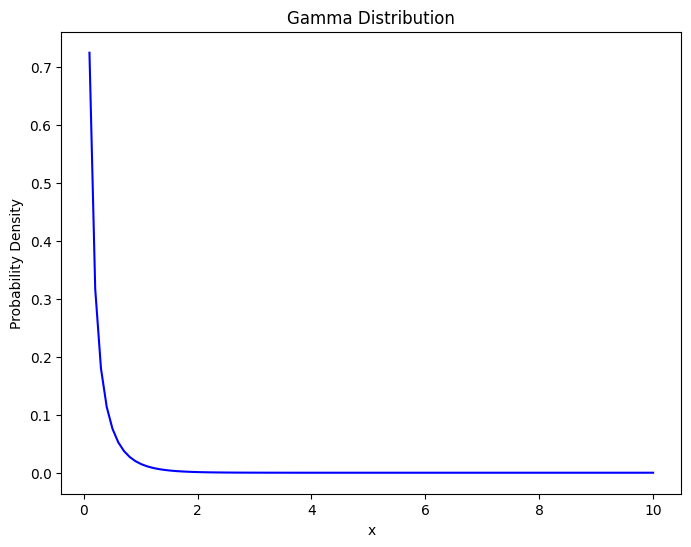

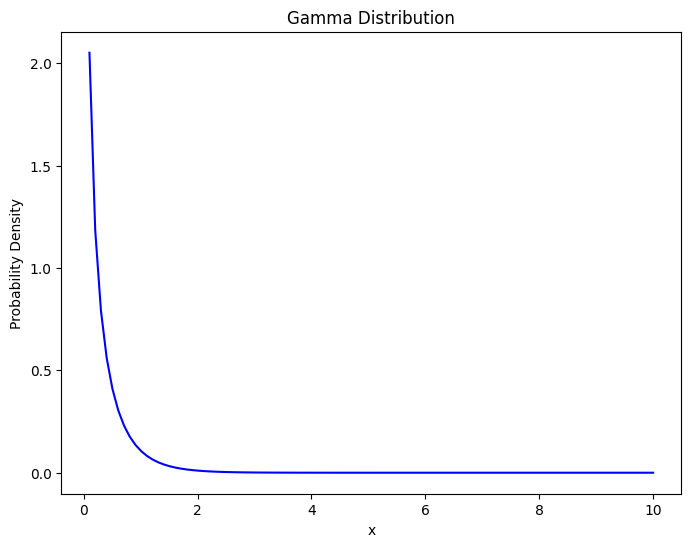

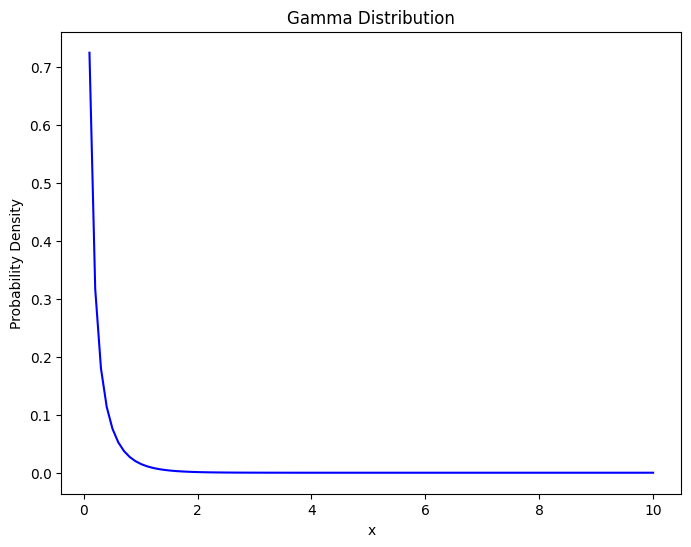

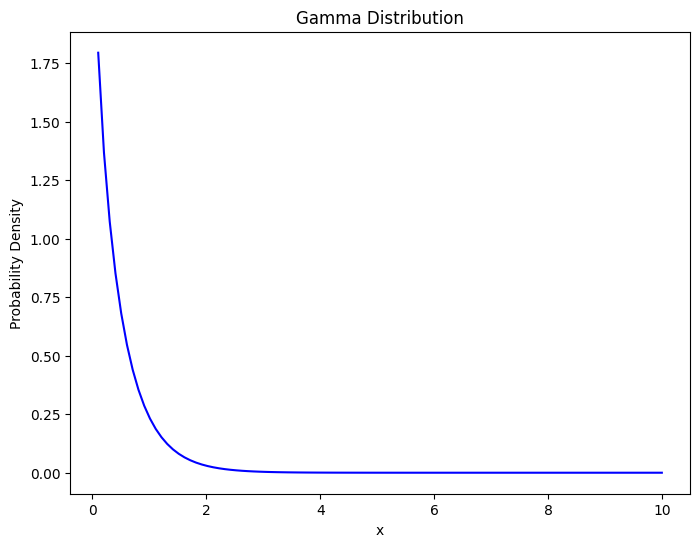

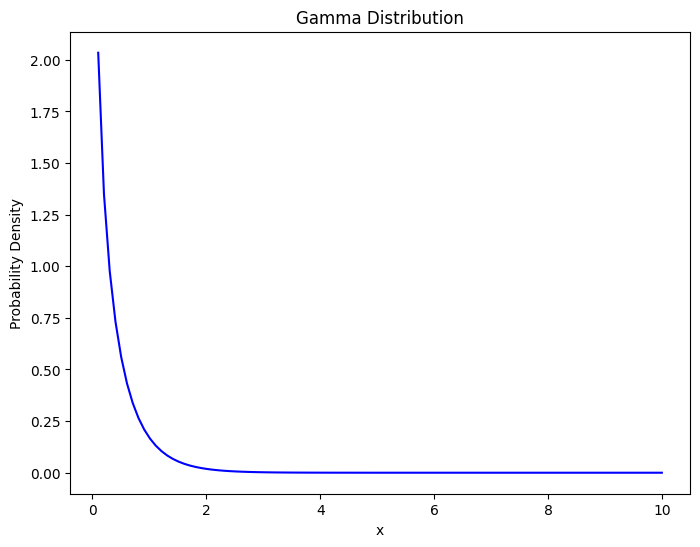

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import ipywidgets as widgets
from ipywidgets import interact

def plot_gamma_distribution(k, theta):
    """
    指定された形状パラメータ k と尺度パラメータ theta に基づき、
    ガンマ分布の確率密度関数をプロットする。
    """
    x = np.linspace(0, 10, 100)
    y = gamma.pdf(x, a=k, scale=theta)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'Gamma PDF (k={k}, θ={theta})', color='blue')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Gamma Distribution')
    plt.ylim(0, max(y) + 0.1)  # y 軸の範囲を調整
    plt.grid(True)
    plt.legend()
    plt.show()

# スライダーで形状パラメータ k と尺度パラメータ theta を調整
interact(plot_gamma_distribution, 
         k=widgets.FloatSlider(value=2.0, min=0.1, max=10.0, step=0.1, description='Shape (k)'),
         theta=widgets.FloatSlider(value=2.0, min=0.1, max=10.0, step=0.1, description='Scale (θ)'))


# Adam (torch)

In [1]:
import torch

# 最適化したい関数 f(x) = (x - 3)^2
def objective_function(x):
    return (x - 3) ** 2

# 最適化対象のパラメータを定義（初期値を0に設定）
x = torch.tensor([0.0], requires_grad=True)

# Adam オプティマイザーの設定
optimizer = torch.optim.Adam([x], lr=0.1)

# 最適化ループ
num_iterations = 1000
for i in range(num_iterations):
    optimizer.zero_grad()  # 勾配の初期化
    loss = objective_function(x)  # 損失（目的）関数の計算
    loss.backward()  # 勾配の計算
    optimizer.step()  # パラメータの更新

    # 進捗の表示
    if i % 100 == 0:
        print(f"Iteration {i}: x = {x.item()}, loss = {loss.item()}")

# 結果表示
print(f"最適化された x の値: {x.item()}")
print(f"最小値: {objective_function(x).item()}")


Iteration 0: x = 0.10000000149011612, loss = 9.0
Iteration 100: x = 2.981938600540161, loss = 0.0003742123080883175
Iteration 200: x = 3.000040054321289, loss = 2.8267663765291218e-09
Iteration 300: x = 3.0000007152557373, loss = 5.115907697472721e-13
Iteration 400: x = 3.000000476837158, loss = 2.2737367544323206e-13
Iteration 500: x = 3.000000238418579, loss = 5.684341886080802e-14
Iteration 600: x = 3.000000238418579, loss = 5.684341886080802e-14
Iteration 700: x = 3.000000238418579, loss = 5.684341886080802e-14
Iteration 800: x = 3.000000238418579, loss = 5.684341886080802e-14
Iteration 900: x = 3.000000238418579, loss = 5.684341886080802e-14
最適化された x の値: 3.000000238418579
最小値: 5.684341886080802e-14


# GpyTorch kernel functions

In [13]:
from gpytorch.kernels import RBFKernel

# RBFカーネルのインスタンス化
kernel = RBFKernel()

# ハイパーパラメータの設定
kernel.lengthscale = 1.0
kernel.variance = 2.0

for i in kernel.parameters():
    print(i)

# 使用例
x1 = torch.tensor([1.0])
x2 = torch.tensor([2.0])
covariance = kernel(x1, x2).evaluate()
print(f"カーネル行列の要素: {covariance.item()}")

for i in kernel.parameters():
    print(i)


>>>
Parameter containing:
tensor([[0.5413]], requires_grad=True)
カーネル行列の要素: 0.6065306663513184
Parameter containing:
tensor([[0.5413]], requires_grad=True)

Parameter containing:
tensor([[0.5413]], requires_grad=True)
カーネル行列の要素: 0.6065306663513184
Parameter containing:
tensor([[0.5413]], requires_grad=True)


In [14]:
import torch
from gpytorch.kernels import RBFKernel

# RBFカーネルのインスタンス化
kernel = RBFKernel()

# ハイパーパラメータの設定
# kernel.lengthscale = 1.0 は直接設定できないので、以下のように設定
kernel.lengthscale = torch.nn.Parameter(torch.tensor([[1.0]]))  # lengthscale を 1.0 に設定

# lengthscale の値を確認
for param in kernel.parameters():
    print(f"lengthscale: {param}")

# 使用例
x1 = torch.tensor([1.0])
x2 = torch.tensor([2.0])
covariance = kernel(x1, x2).evaluate()
print(f"カーネル行列の要素: {covariance.item()}")


KeyError: "attribute 'lengthscale' already exists"

In [20]:
import torch
from gpytorch.kernels import RBFKernel

# RBFカーネルのインスタンス化
kernel = RBFKernel()

# lengthscale の設定
kernel.lengthscale = 1.0  # 直接新しい値を代入して設定

# lengthscale の値を確認
print(f"lengthscale: {kernel.lengthscale.item()}")

# 使用例
x1 = torch.tensor([1.0])
x2 = torch.tensor([2.0])
covariance = kernel(x1, x2).evaluate()
print(f"カーネル行列の要素: {covariance.item()}")


for i in kernel.parameters():
    print(i)

print(kernel.lengthscale)

lengthscale: 1.0
カーネル行列の要素: 0.6065306663513184
Parameter containing:
tensor([[0.5413]], requires_grad=True)
tensor([[1.]], grad_fn=<SoftplusBackward0>)


In [11]:
from dataclasses import dataclass, field
from typing import Optional, Dict, Union, Literal

import torch
from gpytorch.constraints import Interval, GreaterThan, Positive
from gpytorch.kernels import RBFKernel, MaternKernel, ScaleKernel
from gpytorch.priors import GammaPrior, Prior
from torch.nn.functional import softplus


@dataclass
class Priors:
    lengthscale_prior: Prior = field(default_factory=lambda: GammaPrior(3.0, 0.5))
    outputscale_prior: Prior = field(default_factory=lambda: GammaPrior(3.0, 0.5))
    noise_prior: Prior = field(default_factory=lambda: GammaPrior(1.1, 0.05))
    df_prior: Prior = field(default_factory=lambda: GammaPrior(2.0, 0.15))

@dataclass
class Constraints:
    lengthscale_constraint: Interval = field(default_factory=Positive)
    outputscale_constraint: Interval = field(default_factory=Positive)
    noise_constraint: Interval = field(default_factory=Positive)
    df_constraint: Interval = field(default_factory=lambda: GreaterThan(2 + 1e-4))

@dataclass
class Device:
    device: torch.device = torch.device("cpu")
    dtype: torch.dtype = torch.float


@dataclass
class ModelConfig:
    ard_num_dims: Optional[int]  # Changed to Optional[int]
    kernel_type: Literal["rbf", "matern32", "matern52"] = "rbf"
    priors: Priors = field(default_factory=Priors)
    constraints: Constraints = field(default_factory=Constraints)
    device: Device = field(default_factory=Device)
    trained_params: Optional[Dict[str, Union[float, torch.Tensor]]] = None


def kronDelta(X, Xstar):
    return (X.unsqueeze(1) == Xstar.unsqueeze(0)).all(dim=2).float()


# ======================
# Kernel Creation Function
# ======================

def create_kernel(config: ModelConfig):
    """
    Creates the kernel for the GP or TP model based on the specified kernel type.
    """
    # Select base kernel based on kernel_type
    if config.kernel_type == "rbf":
        base_kernel = RBFKernel(
            ard_num_dims=config.ard_num_dims,
            lengthscale_prior=config.priors.lengthscale_prior
            if not (config.trained_params and "lengthscale" in config.trained_params)
            else None,
            lengthscale_constraint=config.constraints.lengthscale_constraint,
        )
    elif config.kernel_type == "matern32":
        base_kernel = MaternKernel(
            nu=1.5,
            ard_num_dims=config.ard_num_dims,
            lengthscale_prior=config.priors.lengthscale_prior
            if not (config.trained_params and "lengthscale" in config.trained_params)
            else None,
            lengthscale_constraint=config.constraints.lengthscale_constraint,
        )
    elif config.kernel_type == "matern52":
        base_kernel = MaternKernel(
            nu=2.5,
            ard_num_dims=config.ard_num_dims,
            lengthscale_prior=config.priors.lengthscale_prior
            if not (config.trained_params and "lengthscale" in config.trained_params)
            else None,
            lengthscale_constraint=config.constraints.lengthscale_constraint,
        )
    else:
        raise ValueError("Invalid kernel type specified. Choose from 'rbf', 'matern32', or 'matern52'.")

    # Set trained lengthscale if available
    if config.trained_params and "lengthscale" in config.trained_params:
        lengthscale_value = torch.tensor(config.trained_params["lengthscale"]).to(
            device=config.device.device, dtype=config.device.dtype
        )
        # Adjust shape based on ard_num_dims
        if config.ard_num_dims is not None:
            # ARD case: lengthscale is of shape (1, ard_num_dims, 1)
            lengthscale_value = lengthscale_value.view(1, config.ard_num_dims, 1)
        else:
            # Non-ARD case: lengthscale is scalar
            lengthscale_value = lengthscale_value
        base_kernel.initialize(lengthscale=lengthscale_value)

    # Wrap the base kernel with ScaleKernel
    kernel = ScaleKernel(
        base_kernel=base_kernel,
        outputscale_prior=config.priors.outputscale_prior
        if not (config.trained_params and "outputscale" in config.trained_params)
        else None,
        outputscale_constraint=config.constraints.outputscale_constraint,
    )

    # Set trained outputscale if available
    if config.trained_params and "outputscale" in config.trained_params:
        outputscale_value = torch.tensor(config.trained_params["outputscale"]).to(
            device=config.device.device, dtype=config.device.dtype
        )
        kernel.initialize(outputscale=outputscale_value)

    return kernel


# ======================
# CovFunc Class with Noise Handling using kronDelta
# ======================

class CovFunc:
    def __init__(self, config: ModelConfig):
        """
        Covariance function wrapper with noise handling for Gaussian Process kernels.
        
        Parameters
        ----------
        config : ModelConfig
            Configuration object that includes kernel type, priors, constraints, and noise settings.
        """
        self.config = config
        self.kernel = create_kernel(config)
        
        # Set noise level as a trainable parameter
        if config.trained_params and "noise" in config.trained_params:
            self.raw_noise = torch.nn.Parameter(
                torch.tensor(config.trained_params["noise"], device=config.device.device, dtype=config.device.dtype)
            )
        else:
            # Initialize with the mean of the noise prior if not specified in trained_params
            self.raw_noise = torch.nn.Parameter(
                torch.tensor(config.priors.noise_prior.mean, device=config.device.device, dtype=config.device.dtype)
            )

    @property
    def noise(self):
        """Apply softplus to ensure noise is positive."""
        return softplus(self.raw_noise)

    def K(self, X, Xstar):
        """
        Computes the covariance matrix including noise using kronDelta.

        Parameters
        ----------
        X : torch.Tensor, shape=(n_samples, n_features)
            Input data.
        Xstar : torch.Tensor, shape=(m_samples, n_features)
            Input data for prediction.

        Returns
        -------
        torch.Tensor
            Covariance matrix with noise component.
        """

        # Kernel matrix computation
        K = self.kernel(X, Xstar).evaluate()
        
        # Add observation noise
        K += self.noise * kronDelta(X, Xstar)
        
        return K

# ======================
# Sample Usage
# ======================

# Config with Specific Kernel Type and Initial Values for Lengthscale, Outputscale, and Noise
config = ModelConfig(
    ard_num_dims=None,  # Set to None for non-ARD (scalar lengthscale)
    kernel_type="matern32",  # "rbf", "matern32", or "matern52"
    trained_params={"lengthscale": 1.0, "outputscale": 1.0, "noise": 0.1}
)

cov_func = CovFunc(config)

# Example data
X = torch.tensor([[1.0], [2.0], [3.0]])
K = cov_func.K(X, X)  # X and Xstar are the same, so noise is added

# ======================
# Print Results
# ======================

print("Covariance matrix with noise:\n", K)
print(f"kernel: \n{cov_func.kernel}\n")
print(f"lengthscale: {cov_func.kernel.base_kernel.lengthscale.item()}")
print(f"outputscale: {cov_func.kernel.outputscale.item()}")


Covariance matrix with noise:
 tensor([[1.7444, 0.4834, 0.1397],
        [0.4834, 1.7444, 0.4834],
        [0.1397, 0.4834, 1.7444]], grad_fn=<AddBackward0>)
kernel: 
ScaleKernel(
  (base_kernel): MaternKernel(
    (raw_lengthscale_constraint): Positive()
  )
  (raw_outputscale_constraint): Positive()
)

lengthscale: 1.0
outputscale: 1.0


In [4]:
kernel = ScaleKernel(RBFKernel(ard_num_dims=None))
X = torch.tensor([[1.0], [2.0], [3.0]])
K = kernel(X, X).evaluate()
print(K)

tensor([[0.6931, 0.2448, 0.0108],
        [0.2448, 0.6931, 0.2448],
        [0.0108, 0.2448, 0.6931]], grad_fn=<MulBackward0>)


In [5]:
kernel

ScaleKernel(
  (base_kernel): RBFKernel(
    (raw_lengthscale_constraint): Positive()
  )
  (raw_outputscale_constraint): Positive()
)

In [13]:
from torch.optim import Adam


# ======================
# GPLogLikelihoodLoss and Optimization Setup
# ======================

class GPLogLikelihoodLoss(torch.nn.Module):
    def __init__(self, cov_func: CovFunc):
        super().__init__()
        self.cov_func = cov_func

    def forward(self, X, y):
        # Compute the covariance matrix
        K = self.cov_func.K(X, X) + 1e-5 * torch.eye(X.size(0))  # Add small jitter for stability

        # Compute log determinant and Mahalanobis term
        L = torch.linalg.cholesky(K)
        alpha = torch.cholesky_solve(y.view(-1, 1), L)
        mahalanobis_term = 0.5 * torch.matmul(y.view(1, -1), alpha).squeeze()
        log_det_term = torch.sum(torch.log(torch.diag(L)))
        constant_term = 0.5 * X.size(0) * torch.log(torch.tensor(2 * torch.pi))

        # Negative log likelihood
        nll = mahalanobis_term + log_det_term + constant_term
        return nll


# Sample Usage
config = ModelConfig(
    ard_num_dims=None,
    kernel_type="matern32",
    trained_params={"lengthscale": 1.0, "outputscale": 1.0, "noise": 0.1}
)

cov_func = CovFunc(config)

# Example data
X = torch.tensor([[1.0], [2.0], [3.0]], requires_grad=True)
y = torch.tensor([1.5, 2.0, 3.5], requires_grad=True)

# Define the log-likelihood loss
loss_fn = GPLogLikelihoodLoss(cov_func)

# Make sure lengthscale, outputscale, and noise are trainable
cov_func.kernel.base_kernel.raw_lengthscale.requires_grad = True
cov_func.kernel.raw_outputscale.requires_grad = True
cov_func.raw_noise.requires_grad = True

# Define the optimizer
optimizer = Adam([
    cov_func.kernel.base_kernel.raw_lengthscale,
    cov_func.kernel.raw_outputscale,
    cov_func.raw_noise
], lr=0.01)

# Optimization loop
n_epochs = 100
for epoch in range(n_epochs):
    optimizer.zero_grad()
    loss = loss_fn(X, y)
    loss.backward()
    optimizer.step()
    
    # Print loss and updated parameters
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}")
    print(f"Updated lengthscale: {cov_func.kernel.base_kernel.lengthscale.item()}")
    print(f"Updated outputscale: {cov_func.kernel.outputscale.item()}")
    print(f"Updated noise: {cov_func.noise.item()}")

# Final optimized parameters
print("Optimized lengthscale:", cov_func.kernel.base_kernel.lengthscale.item())
print("Optimized outputscale:", cov_func.kernel.outputscale.item())
print("Optimized noise:", cov_func.noise.item())

Epoch 1/100, Loss: 7.623806953430176
Updated lengthscale: 1.0063328742980957
Updated outputscale: 1.0063328742980957
Updated noise: 0.7496588826179504
Epoch 2/100, Loss: 7.59937858581543
Updated lengthscale: 1.012686848640442
Updated outputscale: 1.0126864910125732
Updated noise: 0.7549430131912231
Epoch 3/100, Loss: 7.575304985046387
Updated lengthscale: 1.019060730934143
Updated outputscale: 1.0190593004226685
Updated noise: 0.7602468729019165
Epoch 4/100, Loss: 7.551586627960205
Updated lengthscale: 1.025452971458435
Updated outputscale: 1.025449514389038
Updated noise: 0.7655683755874634
Epoch 5/100, Loss: 7.528226852416992
Updated lengthscale: 1.0318621397018433
Updated outputscale: 1.0318554639816284
Updated noise: 0.770905077457428
Epoch 6/100, Loss: 7.505224704742432
Updated lengthscale: 1.038286805152893
Updated outputscale: 1.0382755994796753
Updated noise: 0.7762550115585327
Epoch 7/100, Loss: 7.482581615447998
Updated lengthscale: 1.0447256565093994
Updated outputscale: 1.0

In [15]:
temp = {'lengthscale': 1.0, 'outputscale': 1.0, 'noise': 0.1}
list(temp), list(temp.values())

(['lengthscale', 'outputscale', 'noise'], [1.0, 1.0, 0.1])